In [1]:
# The file that contains the normal DoH traffic data.
normal_doh_traffic_dataset = 'normal_doh_traffic_cloudflare_server.csv'

# The file that contains the malicious DoH traffic.
malicious_doh_traffic_dataset = 'dnscat2_data_4.csv'

# Import the pandas library
import pandas as pd

# Load the datasets into Pandas dataframes
normal_traffic_df    = pd.read_csv(normal_doh_traffic_dataset)
malicious_traffic_df = pd.read_csv(malicious_doh_traffic_dataset)

# Concatenate the normal testing data and the malicious data to
# create the evaluation data set
data_evaluation_df = pd.concat([normal_traffic_df, malicious_traffic_df])

# Shuffle the samples in the whole dataset.
data_evaluation_df = data_evaluation_df.sample(data_evaluation_df.shape[0], random_state=1)

# Save to CSV file
data_evaluation_df.to_csv('combined_doh_dataset.csv', index=False)


In [15]:
# Load dataset
df = pd.read_csv('combined_doh_dataset.csv')
df.columns
df['is_doh'].unique()
df['is_doh'].value_counts()
df['is_doh'] = df['is_doh'].map({
    1: 0,
    4: 1
})




In [16]:
df['is_doh'].unique()


array([1, 0])

Input Features Used: ['bytes_in', 'bytes_out', 'num_pkts_in', 'num_pkts_out', 'bytes_ration', 'time', 'avgdelay', 'maxdelay']
Accuracy: 0.9988142292490119


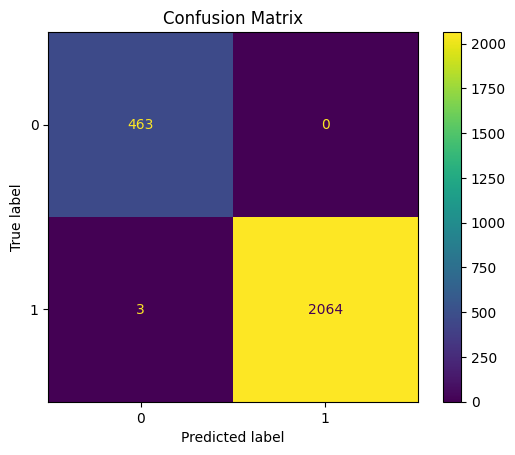

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

target_column = 'is_doh'
y = df[target_column].to_numpy()

features = [
    'bytes_in',
    'bytes_out',
    'num_pkts_in',
    'num_pkts_out',
    'bytes_ration',
    'time',
    'avgdelay',
    'maxdelay'
]

print("Input Features Used:", features)

X = df[features].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1
)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.show()

In [18]:
from sklearn.inspection import permutation_importance

# Compute permutation importance
result = permutation_importance(
    model,
    X_test,
    y_test,
    n_repeats=10,
    random_state=1
)

# Convert to pandas Series for easy viewing
importances = pd.Series(result.importances_mean, index=features)

# Sort descending
importances = importances.sort_values(ascending=False)

print("Feature Importance Scores:")
print(importances)


Feature Importance Scores:
bytes_ration    0.265257
avgdelay        0.050395
num_pkts_in     0.001739
time            0.001107
bytes_out       0.000119
bytes_in        0.000079
num_pkts_out    0.000000
maxdelay        0.000000
dtype: float64


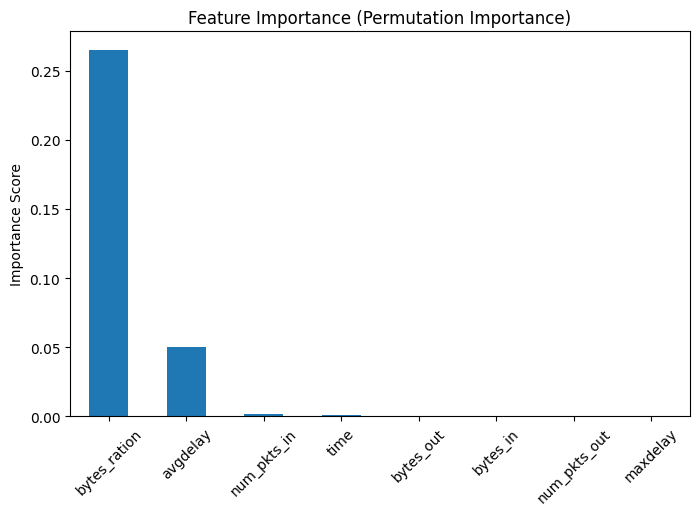

In [19]:
plt.figure(figsize=(8,5))
importances.plot(kind='bar')
plt.title("Feature Importance (Permutation Importance)")
plt.ylabel("Importance Score")
plt.xticks(rotation=45)
plt.show()
